### Fonte [Kaggle](https://www.kaggle.com/datasets) 🔗

##### Projeto: Amazon Top 50 Bestselling Books 2009 - 2019
##### Objetivo: Análise exploratória de dados.
##### Fonte do conjunto: [Amazon Top 50 Bestselling Book](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019/data)

##### Objetivo: Responder as questões abaixo

- Qual gênero tem mais livros nesta categoria?
- Qual é a classificação média de cada gênero?
- Qual é a popularidade de cada gênero e sua relação com o tempo?
- Em que ano houve mais livros vendidos nesta categoria?
- Que efeito o tempo teve no preço dos livros ao longo dos anos?
- Preço dos livros de cada gênero ao longo dos anos.
- Como têm sido as avaliações dos clientes ao longo dos anos?
- Quais gêneros têm as classificações mais altas e mais baixas?
- Qual autor é mais popular e quais ganharam mais nesta categoria?
- Quem é o autor mais popular de cada gênero?
- Quais livros ganharam mais dinheiro em cada gênero?
- O dinheiro que gera livros em geral.
- Qual é a relação da venda com as classificações?

Importando as bibliotecas 📚

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Carregando o conjunto de dados 🎲

In [2]:
df_bestsellers = pd.read_csv('./dataset/bestsellers with categories.csv', encoding = 'latin-1', 
                             dtype = {'Price': float},
                             names = ['name','author','user_rating','reviews','price','year','genre'],
                             header=0
                             )

In [3]:
# Visualizando rapidamente uma amostra do conjunto

df_bestsellers.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
# Utilizando o encadeamento abaixo podemos verificar que NÃO EXISTEM REGISTROS VAZIOS no nosso conjunto, poderiamos
# também ter utilizado o método .info() para obter o mesmo resultado.

df_bestsellers.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [5]:
# Verificando os tipos de dados notei que a coluna "Price" possuia o tipo de dados INT, preferi altera-lá para FLOAT no carregamento da base. 
# Mesmo que só guardemos valores inteiros nessa coluna o tipo FLOAT presenta melhoror esse tipo informação monetaria.

df_bestsellers.dtypes

name            object
author          object
user_rating    float64
reviews          int64
price            int64
year             int64
genre           object
dtype: object

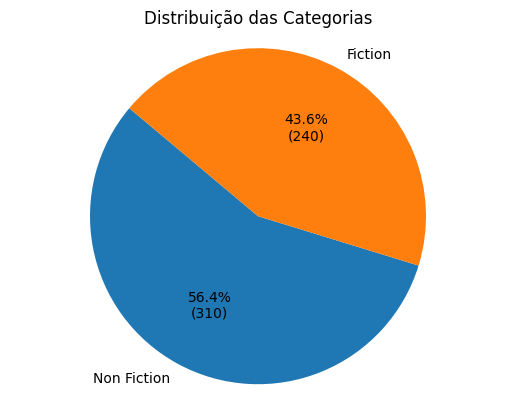

In [6]:
sizes = df_bestsellers['genre'].value_counts()
labels = sizes.index

def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
plt.title('Distribuição das Categorias')
plt.axis('equal')
plt.show()


📌 - Podemos constatar que o gênero de 'Non-Fiction'(Não é ficção) com 56.4% de representatividade é gênero mais consumido entre os Bestsellers de 2009 a 2019.

In [7]:
df_bestsellers.groupby('genre')['user_rating'].mean().round(2)


genre
Fiction        4.65
Non Fiction    4.60
Name: user_rating, dtype: float64

Text(0.5, 0, 'User Rating')

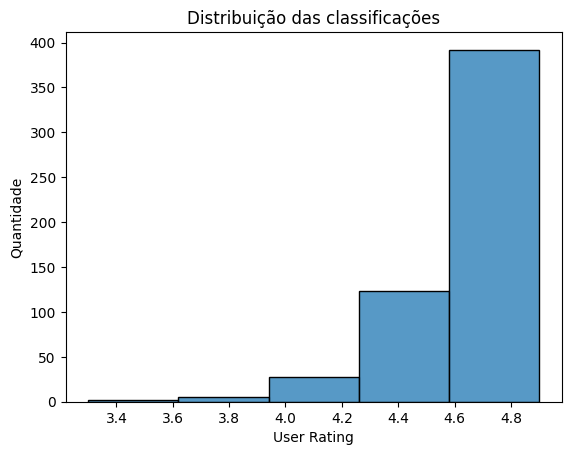

In [8]:
sns.histplot(data=df_bestsellers.user_rating, bins=5)
plt.title('Distribuição das classificações')
plt.ylabel('Quantidade')
plt.xlabel('User Rating')

📌 - Qual é a classificação média de cada gênero
- Fiction        4.65
- Non Fiction    4.60

In [11]:
df_bestsellers[df_bestsellers['genre'] == 'Non Fiction'].groupby('year')['reviews'].sum().sort_values()

year
2009     78682
2010    105796
2013    175223
2011    188000
2014    230894
2012    236725
2017    293736
2015    308665
2016    338098
2019    424774
2018    429602
Name: reviews, dtype: int64

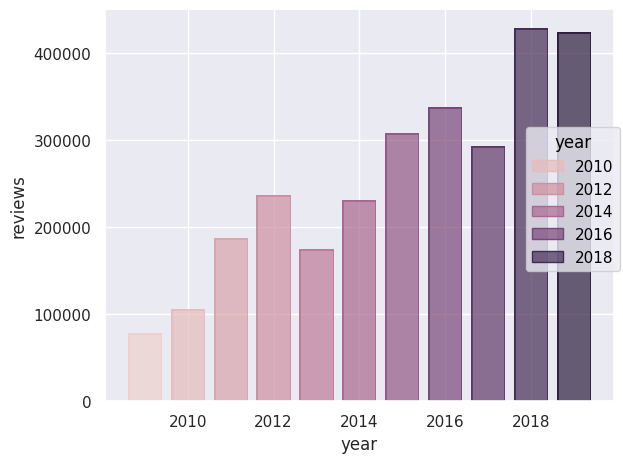

In [13]:
import seaborn.objects as so

df_filtro_no_fiction = df_bestsellers[df_bestsellers['genre'] == 'Non Fiction']
df_grouped = df_filtro_no_fiction.groupby('year', as_index=False)['reviews'].sum()

plot = (
    so.Plot(df_grouped, x="year", y='reviews', color="year")
    .add(so.Bar())
)

plot.show()

📌 - Em que ano houve mais livros vendidos nesta categoria?
- Baseado nas review, o ano com mais vendas foi em 2018 com 429.602 exemplares vendidos.